In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
import itertools

In [2]:
sns.set(context="notebook", style="ticks")

In [3]:
DATA_INPUT_DIR = "D:\\p_eaglesense\\eaglesense\\data\\topviewkinect"

In [4]:
DATA_OUTPUT_DIR = DATA_INPUT_DIR + "\\v2"
if not os.path.exists(DATA_OUTPUT_DIR):
    os.makedirs(DATA_OUTPUT_DIR)

### features and labels

In [8]:
data_dirs = []
for subdir in sorted(next(os.walk(DATA_INPUT_DIR))[1]):
    if subdir.isdigit():
        data_dirs.append(int(subdir))
data_dirs.sort(key=int)

In [9]:
data_dirs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [10]:
ignored_X_cols = ["frame_id", "skeleton_id", "x", "y", "z"]
ignored_y_cols = ["frame_id", "skeleton_id", "orientation", "orientation_accurate"]

In [11]:
all_X_csv = "{d}/{tag}_X.csv".format(d=DATA_OUTPUT_DIR, tag="v1")
all_y_csv = "{d}/{tag}_y.csv".format(d=DATA_OUTPUT_DIR, tag="v1")

In [12]:
open(all_X_csv, "w").close()
open(all_y_csv, "w").close()

all_X_file = open(all_X_csv, "a")
all_y_file = open(all_y_csv, "a")

write_header=True

for dataset_id in data_dirs:
    # read data
    X_csv = "{d}/{dataset}/features.csv".format(d=DATA_INPUT_DIR, dataset=dataset_id)
    X_df = pd.read_csv(X_csv, dtype=np.float64)
    y_csv = "{d}/{dataset}/labels.csv".format(d=DATA_INPUT_DIR, dataset=dataset_id)
    y_df = pd.read_csv(y_csv, dtype=np.float64)

    # get single skeleton activities
    y_df = y_df.loc[y_df["skeleton_id"] == 0]
    y_df = y_df.loc[y_df["activity"].isin(list(range(0, 6)))]

    # get common frame indices
    X_df = X_df.loc[X_df["frame_id"].isin(y_df["frame_id"].values)]
    y_df = y_df.loc[y_df["frame_id"].isin(X_df["frame_id"].values)]
    
    # drop unncessary columns
    X_df = X_df.drop(labels=ignored_X_cols, axis=1)
    y_df = y_df.drop(labels=ignored_y_cols, axis=1)
    
    # add dataset id
    X_df["dataset_id"] = dataset_id
    y_df["dataset_id"] = dataset_id
    
    # save to csv
    X_df = X_df.astype("float64")
    X_df.to_csv(all_X_file, header=write_header, index=False)
    y_df = y_df.astype("int")
    y_df.to_csv(all_y_file, header=write_header, index=False)
    
    write_header = False
    
    print(dataset_id, "Done!")
    
all_X_file.close()
all_y_file.close()

1 Done!
2 Done!
3 Done!
4 Done!
5 Done!
6 Done!
7 Done!
8 Done!
9 Done!
10 Done!
11 Done!
12 Done!
13 Done!
14 Done!
15 Done!
16 Done!
17 Done!
18 Done!
19 Done!
20 Done!
21 Done!


### overview

In [13]:
ACTIVITIES = ["Standing", "Sitting", "Pointing", "Phone", "Tablet", "Paper"]

In [14]:
num_activities = len(ACTIVITIES)

In [15]:
num_activities

6

In [16]:
X_all_df = pd.read_csv(all_X_csv, dtype=np.float64)
y_all_df = pd.read_csv(all_y_csv, dtype=np.int)

In [17]:
X_all_df.shape

(93942, 73)

In [18]:
y_all_df.shape

(93942, 2)

In [19]:
num_datasets = len(np.unique(y_all_df["dataset_id"]))

In [20]:
num_datasets

21

In [21]:
X_vec = X_all_df.drop(["dataset_id"], axis=1)
y_vec = y_all_df.drop(["dataset_id"], axis=1)

In [22]:
X_corr = X_vec.corr()

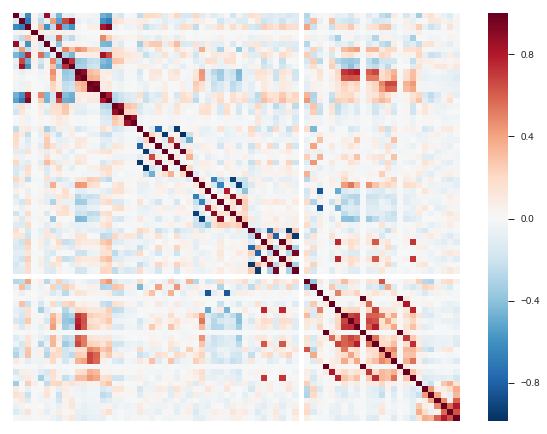

In [23]:
fig, ax = plt.subplots(figsize=(10,7.5))
x = sns.heatmap(X_corr, ax=ax, xticklabels=False, yticklabels=False, cmap="RdBu_r")

In [24]:
y_bins = np.bincount(np.squeeze(y_vec))
activities_df = pd.DataFrame({
    "activity": ACTIVITIES, "size": y_bins
})

Text(0,0.5,'')

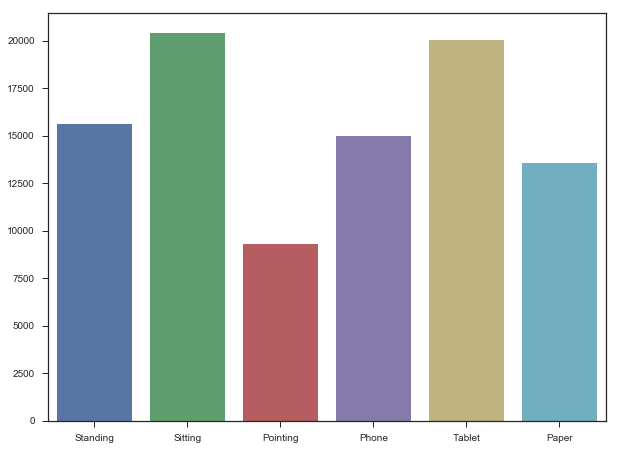

In [25]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.barplot(x="activity", y="size", data=activities_df, ax=ax)
ax.set_xlabel("")
ax.set_ylabel("")

In [26]:
y_min_count = min(y_bins)

In [27]:
y_min_count

9278

In [28]:
X_balanced_df = pd.DataFrame(columns=X_all_df.columns, dtype=np.float64)

In [29]:
X_balanced_df

,layer_area_0,layer_area_1,layer_area_2,layer_contours_0,layer_contours_1,layer_distance_0,layer_distance_1,layer_distance_2,layer_distance_3,layer_distance_4,...,interlayer_pos_16,interlayer_pos_17,extremities0,extreme_infrared_0,extreme_infrared_1,extreme_infrared_2,extreme_infrared_3,extreme_infrared_4,extreme_infrared_5,dataset_id


In [30]:
y_balanced_df = pd.DataFrame(columns=y_all_df.columns, dtype=np.int)

In [31]:
y_balanced_df

,activity,dataset_id


In [32]:
for activity_id in range(num_activities):
    samples_y = y_all_df.loc[(y_all_df["activity"] == activity_id)]
    samples_y = samples_y.sample(y_min_count, replace=False, random_state=42)
    samples_X = X_all_df.iloc[samples_y.index]
    X_balanced_df = X_balanced_df.append(samples_X, ignore_index=True)
    y_balanced_df = y_balanced_df.append(samples_y, ignore_index=True)

In [33]:
X_balanced_df = X_balanced_df.astype(np.float64)

In [34]:
X_balanced_df.shape

(55668, 73)

In [35]:
y_balanced_df = y_balanced_df.astype(np.int)

In [36]:
y_balanced_df.shape

(55668, 2)

In [37]:
X_vec = X_balanced_df.drop(["dataset_id"], axis=1)
y_vec = y_balanced_df.drop(["dataset_id"], axis=1)

In [38]:
X_corr = X_vec.corr()

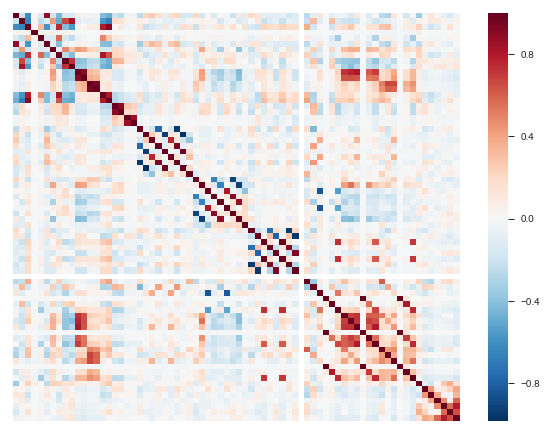

In [39]:
fig, ax = plt.subplots(figsize=(10,7.5))
x = sns.heatmap(X_corr, ax=ax, xticklabels=False, yticklabels=False, cmap="RdBu_r")

In [40]:
y_bins = np.bincount(np.squeeze(y_vec))
activities_df = pd.DataFrame({
    "activity": ACTIVITIES, "size": y_bins
})

Text(0,0.5,'')

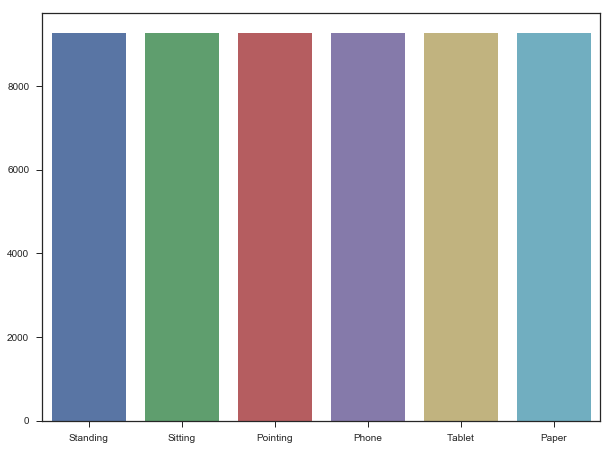

In [41]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.barplot(x="activity", y="size", data=activities_df, ax=ax)
ax.set_xlabel("")
ax.set_ylabel("")

In [42]:
X_final_df = X_balanced_df.drop(labels=["dataset_id"], axis=1)

In [43]:
y_final_df = y_balanced_df.drop(labels=["dataset_id"], axis=1)

In [44]:
X_final_df.head()

,layer_area_0,layer_area_1,layer_area_2,layer_contours_0,layer_contours_1,layer_distance_0,layer_distance_1,layer_distance_2,layer_distance_3,layer_distance_4,...,interlayer_pos_15,interlayer_pos_16,interlayer_pos_17,extremities0,extreme_infrared_0,extreme_infrared_1,extreme_infrared_2,extreme_infrared_3,extreme_infrared_4,extreme_infrared_5
0,0.421598,0.418639,0.159763,3.0,3.0,23.6008,32.8024,25.2982,32.8024,232.0,...,-32.0,-26.0,-123.0,5.0,4.0,6.5,4.0,24.5,18.5,36.5
1,0.426984,0.419048,0.153968,3.0,3.0,23.7697,31.3847,24.8395,25.4951,166.0,...,-7.0,-13.0,-18.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.464716,0.397590,0.137694,3.0,3.0,19.4165,22.3607,19.6469,22.3607,192.0,...,-9.0,-27.0,-107.0,5.0,23.5,26.0,16.0,1.5,1.5,29.0
3,0.316847,0.591963,0.091190,3.0,3.0,17.7200,31.9061,19.6977,31.9061,311.5,...,-32.0,-20.0,-112.0,5.0,13.5,0.0,19.5,18.0,6.0,31.5
4,0.428000,0.410000,0.162000,3.0,3.0,22.5610,19.6469,14.8661,19.6469,179.5,...,-29.0,-28.0,-117.0,3.0,3.5,3.0,2.0,0.0,0.0,3.5


In [45]:
y_final_df.head()

,activity
0,0
1,0
2,0
3,0
4,0


In [46]:
X_final_csv = "{d}/{tag}_X.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final")
y_final_csv = "{d}/{tag}_y.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final")

In [47]:
X_final_file = open(X_final_csv, "w")
y_final_file = open(y_final_csv, "w")

X_final_df.to_csv(X_final_file, header=False, index=False)
y_final_df.to_csv(y_final_file, header=False, index=False)

X_final_file.close()
y_final_file.close()

###  data sampling

In [48]:
def sample_test_split(X_df, y_df, train_ratio, seed=42):
    
    train_size = math.floor(len(X_df) * train_ratio)
    
    X_train_df = X_df.sample(train_size, replace=False, random_state=seed)
    y_train_df = y_df.loc[X_train_df.index]
    
    X_test_df = X_df.loc[~X_df.index.isin(X_train_df.index)]
    y_test_df = y_df.loc[X_test_df.index]
    
    X_train, y_train = X_train_df.values, y_train_df.values
    X_test, y_test = X_test_df.values, y_test_df.values
    
    return X_train, y_train, X_test, y_test

In [49]:
X_train, y_train, X_test, y_test = sample_test_split(X_final_df, y_final_df, 7/10)

In [50]:
X_train.shape

(38967, 72)

In [51]:
y_train.shape

(38967, 1)

In [52]:
X_test.shape

(16701, 72)

In [53]:
y_test.shape

(16701, 1)

In [54]:
np.savetxt("{d}/{tag}_X_train.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), X_train, delimiter=",", fmt="%.3f")
np.savetxt("{d}/{tag}_y_train.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), y_train, delimiter=",", fmt="%.3f")
np.savetxt("{d}/{tag}_X_test.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), X_test, delimiter=",", fmt="%.3f")
np.savetxt("{d}/{tag}_y_test.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), y_test, delimiter=",", fmt="%.3f")

### training

In [55]:
import xgboost as xgb
from sklearn import metrics

In [56]:
def get_normalized_confusion_matrix(y_true, y_predicted):
    confusion_matrix = metrics.confusion_matrix(y_true, y_predicted)
    confusion_matrix_normalized = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
    confusion_matrix_normalized *= 100
    return confusion_matrix_normalized

In [65]:
XGB_PARAM_FINAL = {}
XGB_PARAM_FINAL["eta"] = 0.3
XGB_PARAM_FINAL["gamma"] = 1
XGB_PARAM_FINAL["lambda"] = 1
XGB_PARAM_FINAL["alpha"] = 0
XGB_PARAM_FINAL["max_depth"] = 6
XGB_PARAM_FINAL["colsample_bytree"] = 0.5
XGB_PARAM_FINAL["colsample_bylevel"] = 0.5
XGB_PARAM_FINAL["subsample"] = 0.5
XGB_PARAM_FINAL["objective"] = "multi:softmax"
XGB_PARAM_FINAL["eval_metric"] = "merror"
XGB_PARAM_FINAL["num_class"] = len(ACTIVITIES)
XGB_PARAM_FINAL["silent"] = 0
XGB_PARAM_FINAL["seed"] = 42
XGB_NUM_ROUNDS = 200
XGB_EARLYSTOPPING_ROUNDS = 10

In [58]:
X = np.genfromtxt("{d}/{tag}_X.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), delimiter=",", dtype=np.float)
y = np.genfromtxt("{d}/{tag}_y.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), delimiter=",", dtype=np.float)
X_train = np.genfromtxt("{d}/{tag}_X_train.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), delimiter=",", dtype=np.float)
y_train = np.genfromtxt("{d}/{tag}_y_train.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), delimiter=",", dtype=np.float)
X_test = np.genfromtxt("{d}/{tag}_X_test.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), delimiter=",", dtype=np.float)
y_test = np.genfromtxt("{d}/{tag}_y_test.csv".format(d=DATA_OUTPUT_DIR, tag="v1_final"), delimiter=",", dtype=np.float)

In [59]:
train_xgbmatrix = xgb.DMatrix(X_train, y_train)
test_xgbmatrix = xgb.DMatrix(X_test, y_test)
watchlist = [(train_xgbmatrix, "train"), (test_xgbmatrix, "eval")]

In [66]:
eval_results = {}
validation = xgb.train(params=XGB_PARAM_FINAL, dtrain=train_xgbmatrix, evals=watchlist, evals_result=eval_results, 
                       num_boost_round=XGB_NUM_ROUNDS, early_stopping_rounds=XGB_EARLYSTOPPING_ROUNDS, verbose_eval=100)

[0]	train-merror:0.180024	eval-merror:0.185498
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 10 rounds.
[100]	train-merror:0.004902	eval-merror:0.046285
Stopping. Best iteration:
[120]	train-merror:0.003208	eval-merror:0.044907



In [67]:
validation.best_iteration+1

121

In [68]:
booster = xgb.train(params=XGB_PARAM_FINAL, dtrain=train_xgbmatrix, num_boost_round=validation.best_iteration+1)

In [69]:
y_predicted = booster.predict(test_xgbmatrix)

In [70]:
accuracy = metrics.accuracy_score(y_test, y_predicted)

In [71]:
accuracy

0.955092509430573

In [72]:
confusion_matrix = get_normalized_confusion_matrix(y_test, y_predicted)

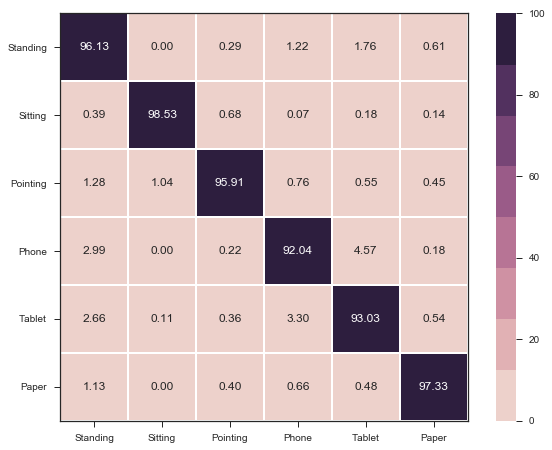

In [73]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.heatmap(data=confusion_matrix, annot=True, fmt=".2f", linewidths=1, square=True,
            vmin=0, vmax=100, ax=ax, xticklabels=ACTIVITIES, yticklabels=ACTIVITIES, cmap=sns.cubehelix_palette(8))
plt.yticks(rotation=0)
sns.despine(top=False, right=False, left=False, bottom=False)

In [74]:
all_dmatrix = xgb.DMatrix(X, y)

In [75]:
final_booster = xgb.train(params=XGB_PARAM_FINAL, dtrain=all_dmatrix, num_boost_round=validation.best_iteration+1)

In [76]:
final_booster.save_model("v2.model")